In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from matplotlib.animation import FuncAnimation
x_init = 0.5
N = 200
r = np.arange(2.,4.,.00001)

We begin by preallocating an $x$ array that will have the same array size as $r$ using ```np.full_like```. In the second argument, the array is filled with values of initial x values, x_init = 0.5.

The for loop will give us our time, t. Some arbitrary value, probably seconds.

[0.5 0.5 0.5 ... 0.5 0.5 0.5]


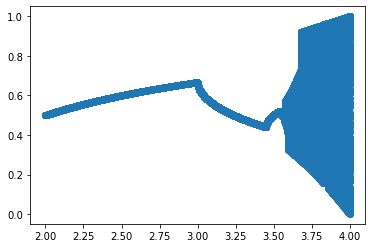

In [7]:
x = np.full_like(r,x_init) #makes an x array that is the same size as r filled with x_init
print(x)
for n in range(1000): #this for loop tell us how many trials of the logistical map to do
    x = x * r * (1 - x)
plt.scatter(r,x)

In [8]:
print(x)
x.shape

[0.5        0.5000025  0.500005   ... 0.06680585 0.22342918 0.12044155]


(200000,)

``` r.shape ``` gives the size of r array, but since ```np.empty``` takes integers for the empty size, we only choose the first index so ```r.shape[0]```

We make the preallocate an empty array of dimensions "N + 1" $\times$ "r.shape[0]"

In [9]:
x_val = np.empty((N+1,r.shape[0]),dtype=np.float64)
r_val = np.empty((N+1,r.shape[0]),dtype=np.float64)
print(x_val)
print(x_val.shape)
print(x_val.size)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(201, 200000)
40200000


In [10]:
x_val[0,:]=x
r_val[0,:]=r
print(x_val)
print(x_val.shape)
print(r_val.shape)

[[0.5        0.5000025  0.500005   ... 0.06680585 0.22342918 0.12044155]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(201, 200000)
(201, 200000)


In [11]:
for n in range(1, N+1):
    x_val[n,:] = x_val[n-1]*r*(1-x_val[n-1])

In [23]:
print(x_val)

[[0.5        0.5000025  0.500005   ... 0.06680585 0.22342918 0.12044155]
 [0.5        0.5000025  0.500005   ... 0.24936943 0.69403086 0.42374047]
 [0.5        0.5000025  0.500005   ... 0.74873165 0.84940385 0.97673549]
 ...
 [0.5        0.5000025  0.500005   ... 0.94364156 0.91426508 0.08244605]
 [0.5        0.5000025  0.500005   ... 0.21272707 0.3135362  0.30259403]
 [0.5        0.5000025  0.500005   ... 0.66989204 0.86092071 0.84412142]]


In [21]:
x_final = np.empty_like(x_val)
for n in range(r.shape[0]): #recall that r.shape[0] = 2000
    #print(x_val[:,n])
    x_final[:,n]=np.sort(x_val[:,n])
print(x_final)
print(x_final.shape)

[[5.00000000e-01 5.00002500e-01 5.00005000e-01 ... 1.74598838e-04
  3.18409785e-05 4.42575058e-05]
 [5.00000000e-01 5.00002500e-01 5.00005000e-01 ... 6.98268177e-04
  1.27359222e-04 1.77021746e-04]
 [5.00000000e-01 5.00002500e-01 5.00005000e-01 ... 2.20731490e-03
  2.84016868e-04 3.91910826e-04]
 ...
 [5.00000000e-01 5.00002500e-01 5.00005000e-01 ... 9.99328382e-01
  9.99555726e-01 9.98516624e-01]
 [5.00000000e-01 5.00002500e-01 5.00005000e-01 ... 9.99447862e-01
  9.99928990e-01 9.99902012e-01]
 [5.00000000e-01 5.00002500e-01 5.00005000e-01 ... 9.99956348e-01
  9.99992040e-01 9.99988935e-01]]
(201, 200000)


In [13]:
print(x_final.shape)
print(r.shape)

(201, 200000)
(200000,)


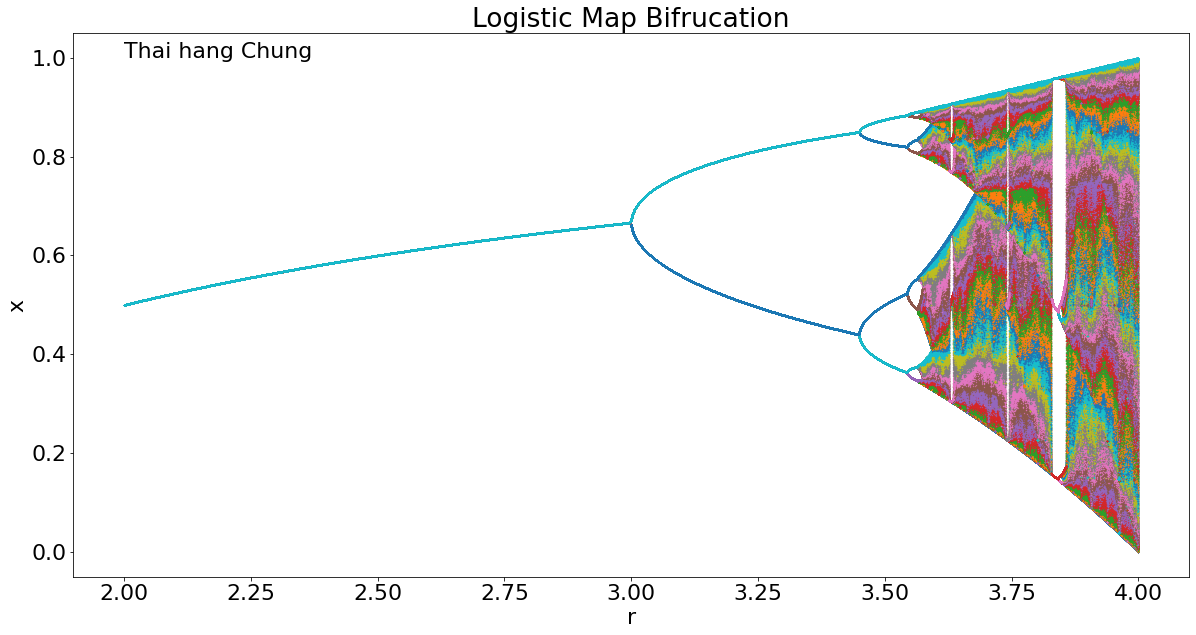

In [34]:
for i in range(N):
    
    if i % 5 ==0:
        plt.scatter(r,x_final[i],s=0.1)
        plt.rcParams["figure.figsize"] = (20,10)
        #plt.pause(0.001)

        #fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax2.transAxes)
plt.text(2,1,"Thai hang Chung")

plt.rcParams.update({'font.size': 22})
plt.xlabel("r")
plt.ylabel("x")
plt.title("Logistic Map Bifrucation")
plt.savefig("bifrucation.png",facecolor='w')

In [15]:
new_x = x_val.flatten('C')
new_x.shape

(40200000,)

In [16]:
new_r = r_val.flatten('C')

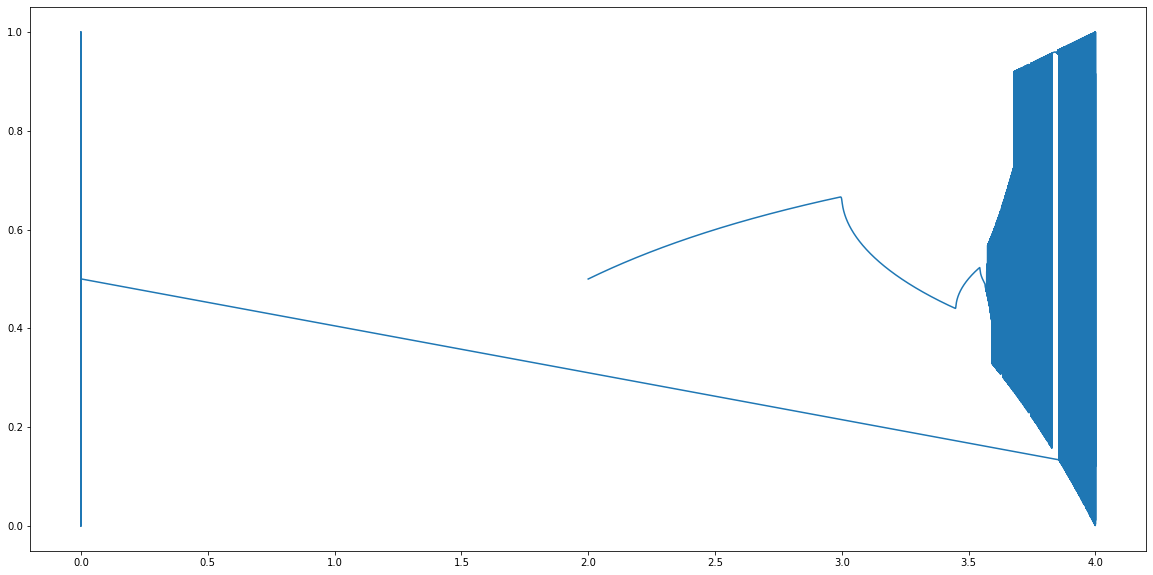

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
#line, = ax.plot(r,x_val[i,:])
line, = ax.plot(new_r,new_x)
def animate_func(i):
    line.set_data(new_r[i],new_x[i])
    return line,

In [18]:
animate_func(2)

(<matplotlib.lines.Line2D at 0x7f72cd895be0>,)

In [14]:
#ani = FuncAnimation(fig, animate_func, interval=100, frames=N)
ani = ani.FuncAnimation(fig, animate_func, len(new_r), interval = 100, blit=False)
ani.save('bifrucation.gif', writer='ffmpeg')
plt.show()

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1440x720', '-pix_fmt', 'rgba', '-r', '10.0', '-loglevel', 'error', '-i', 'pipe:', '-filter_complex', 'split [a][b];[a] palettegen [p];[b][p] paletteuse', '-y', 'bifrucation.gif']' died with <Signals.SIGKILL: 9>.

In [70]:
a = [1,2,3,4]
np.sin(a)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [244]:
a[1:3]

[2, 3]

In [250]:
var = np.array([7,8,9,10,11,12])

In [251]:
var[:3]

array([7, 8, 9])

In [252]:
var[-2:]

array([11, 12])

In [253]:
var[::2]

array([ 7,  9, 11])

In [265]:
two_d = np.arange(20).reshape(4,5)
two_d

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [270]:
choose3rdcol = two_d[:,2]
choose3rdcol

array([ 2,  7, 12, 17])

In [272]:
choose2ndrow = two_d[1,:]
choose2ndrow

array([5, 6, 7, 8, 9])

In [274]:
test = np.arange(25).reshape(5,5)
test

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [278]:
test[:,1::2]

array([[ 1,  3],
       [ 6,  8],
       [11, 13],
       [16, 18],
       [21, 23]])

In [289]:
test[4,:]

array([20, 21, 22, 23, 24])

In [288]:
test[1:4:2,:3:2]

array([[ 5,  7],
       [15, 17]])

In [290]:
test

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [294]:
test[[0,2,3,3],
    [2,3,1,4]]

array([ 2, 13, 16, 19])

In [316]:
mask = test % 3
mask

divis3 = test[mask==0]
divis3

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24])